This is a dataset collected from the bank. The dataset contains various customer 
information such as Gender, Education, Credit Limit, and Payment history. From the 
perspective of risk management, the bank wants to build a classification model to 
predict which customer will have default payment in the next month.


Requirements : 
No missing values,
Data is in numeric format,
Date is stored in pandas DataFrame or NumPy array

see how many times they consequtively do not pay for their payments

In [20]:
# Importing libarys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
# Reading credit dataset
data = pd.read_csv('credit_dataset.csv', index_col=0)


Take a look at our data

In [22]:
# Print the first few rows of the data
print(data.head())
print(data.shape)

             Credit Limit  Gender    Education Marriage Status  Age  \
Customer ID                                                           
1                   20000  female  univeresity         married   24   
2                  120000  female  univeresity          single   26   
3                   90000  female  univeresity          single   34   
4                   50000  female  univeresity         married   37   
5                   50000    male  univeresity         married   57   

             Bill_Amount1  Bill_Amount2  Bill_Amount3  Pay_Amount1  \
Customer ID                                                          
1                    3913          3102           689            0   
2                    2682          1725          2682            0   
3                   29239         14027         13559         1518   
4                   46990         48233         49291         2000   
5                    8617          5670         35835         2000   

           

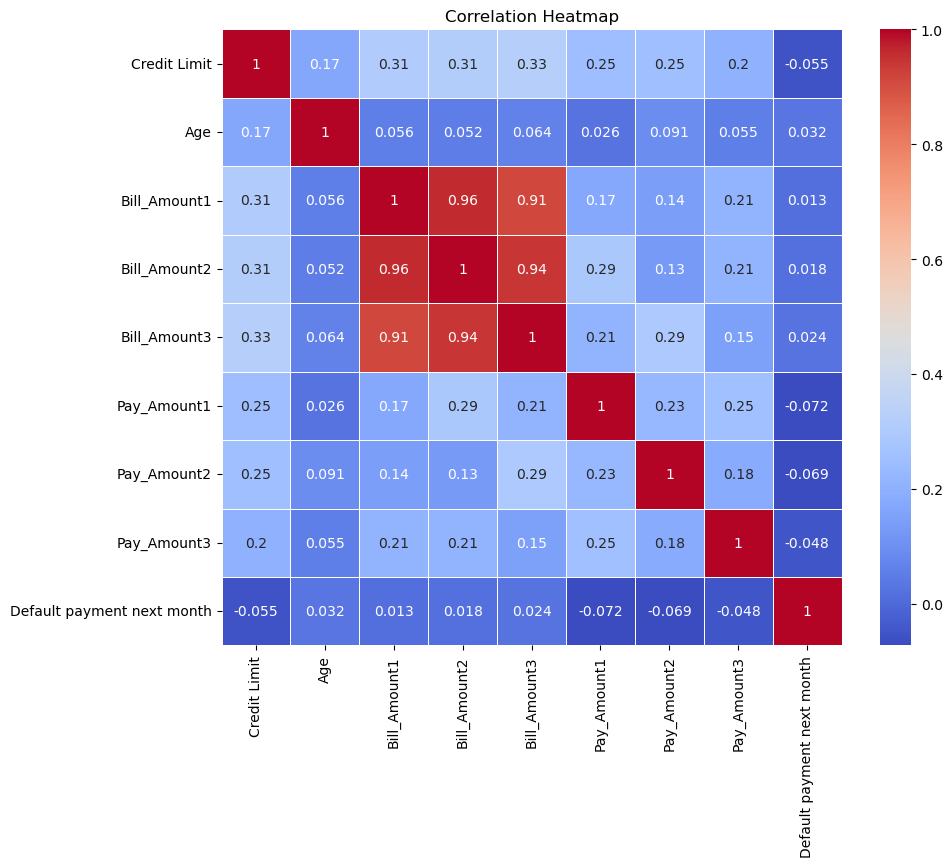

In [23]:
# Computing the correlation matrix
corr_matrix = data.corr()

# Creating a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

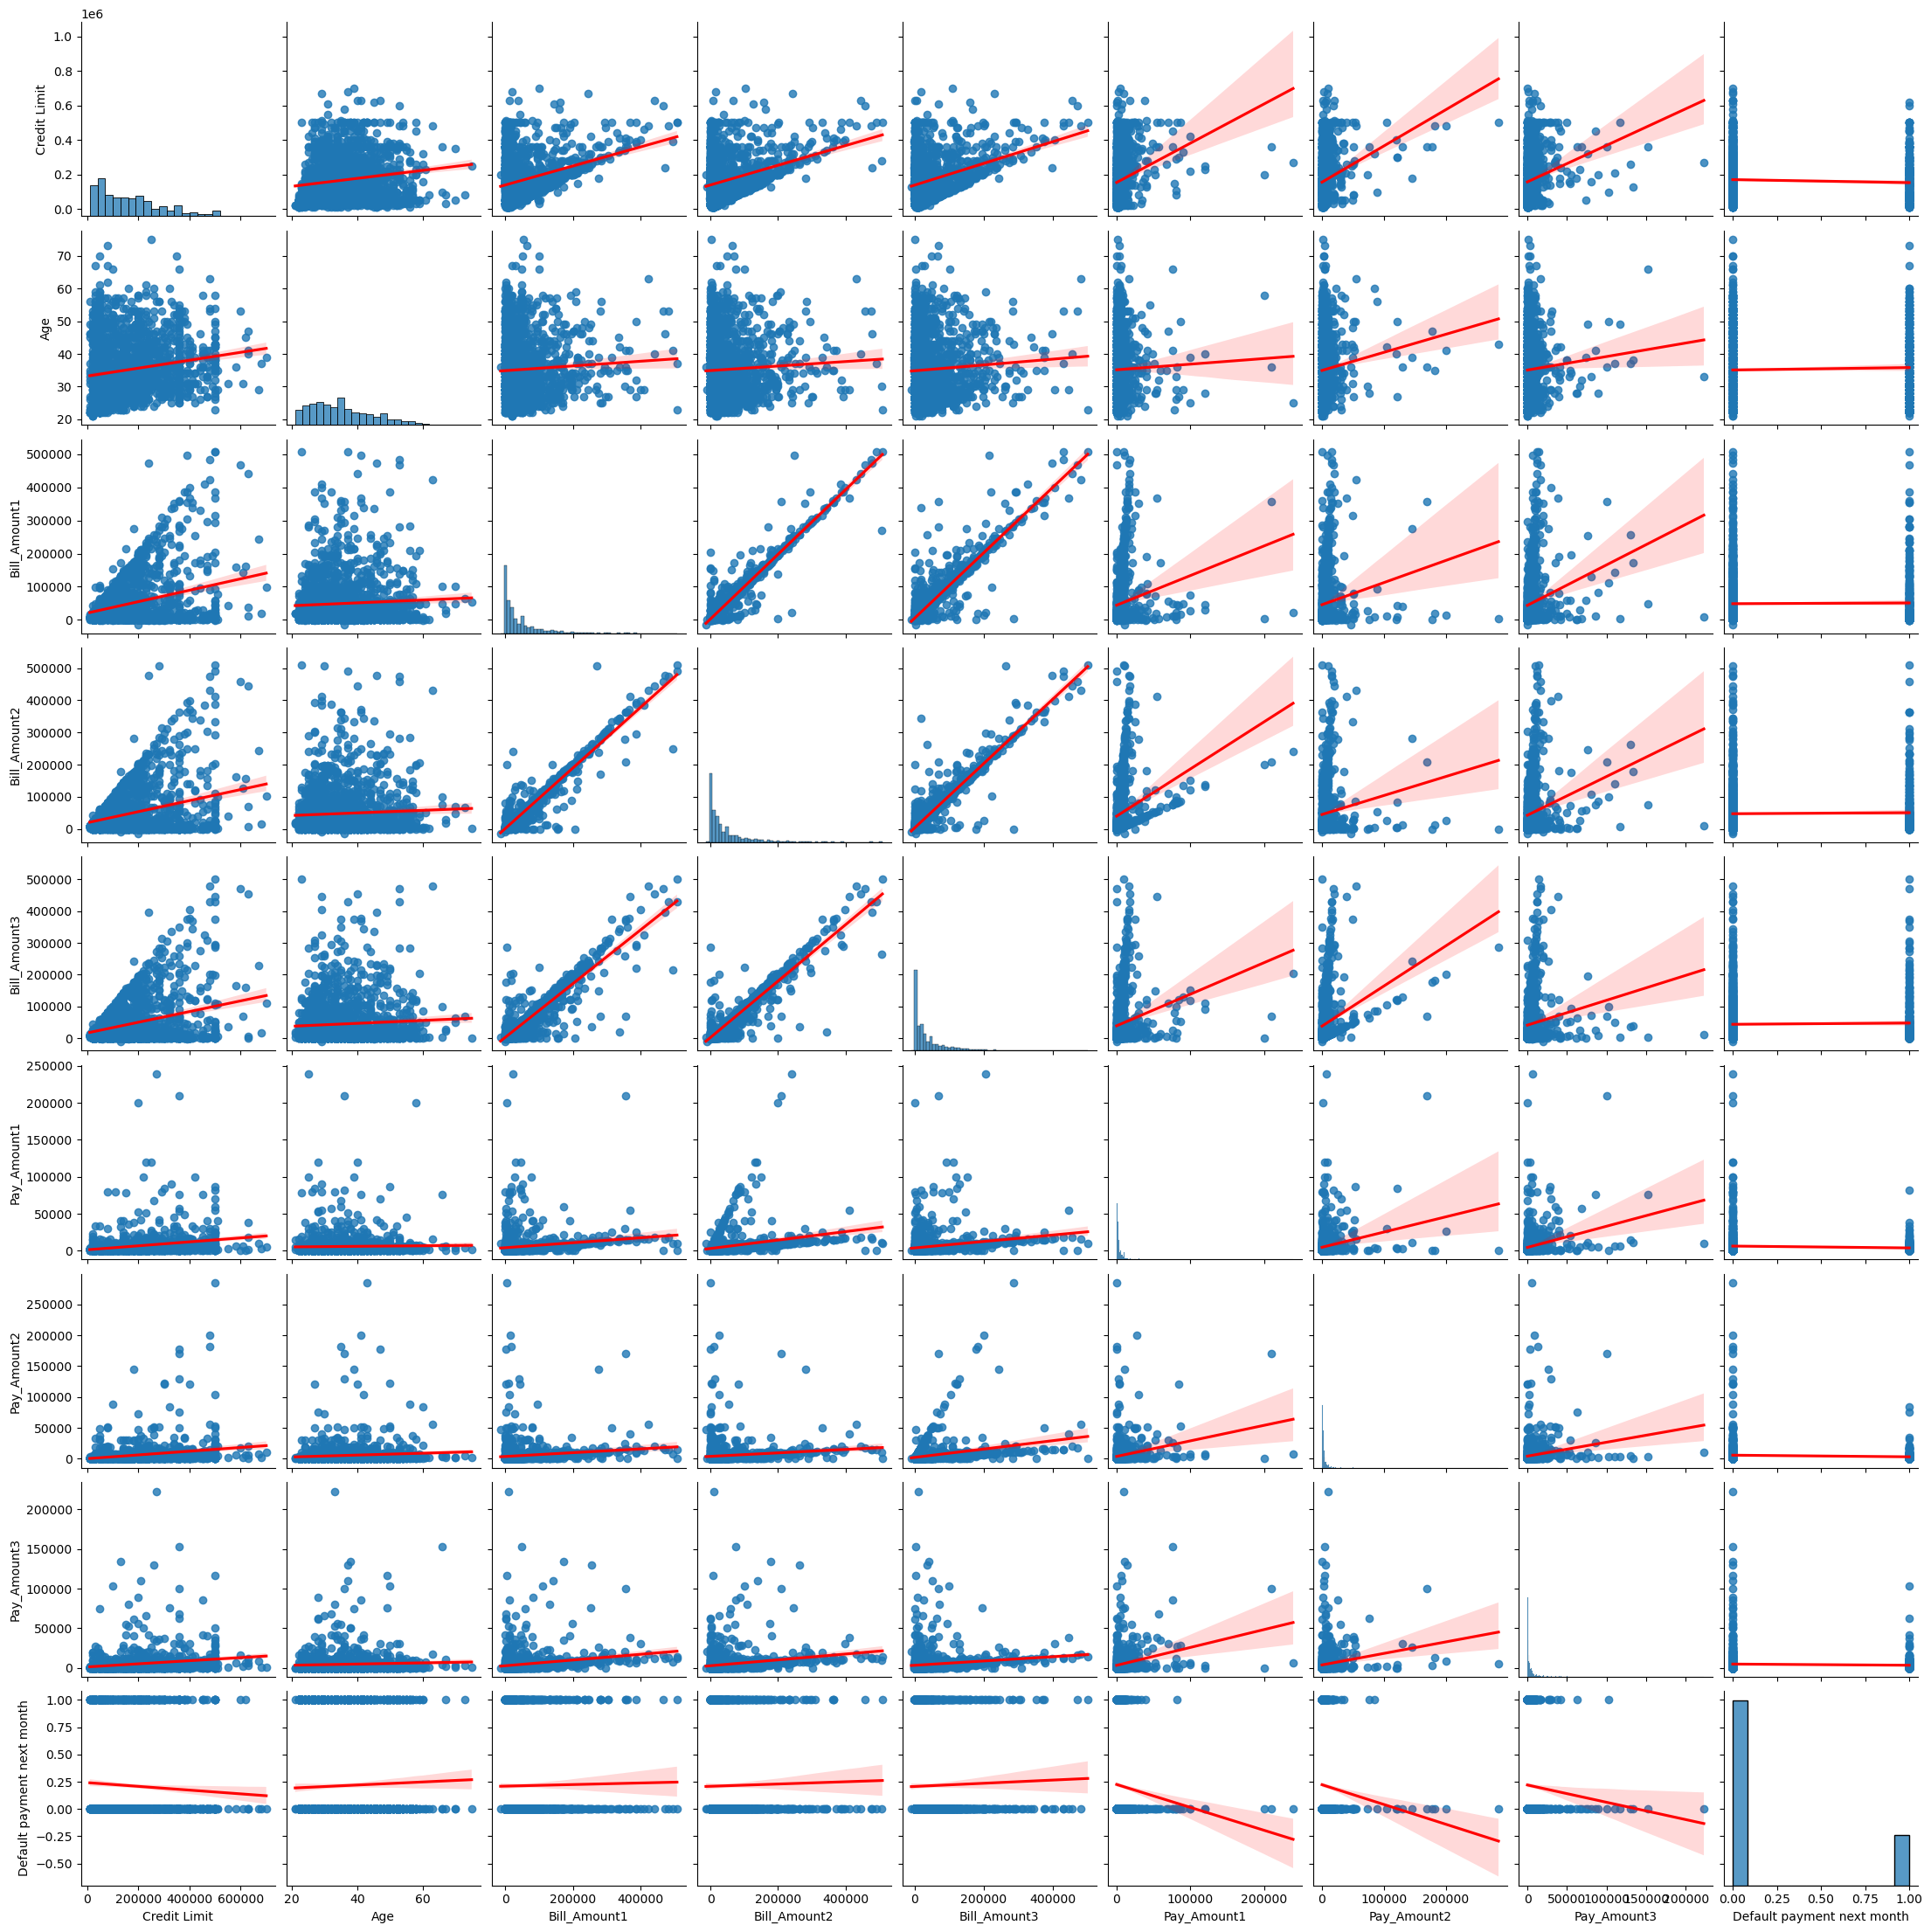

In [24]:
# Creating a heatmap using Seaborn
sns.pairplot(data, kind="reg", plot_kws={'line_kws':{'color':'red'}})
plt.show()

In [25]:
data.describe()

,Credit Limit,Age,Bill_Amount1,Bill_Amount2,Bill_Amount3,Pay_Amount1,Pay_Amount2,Pay_Amount3,Default payment next month
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,166787.500000,35.224375,49263.408125,47726.644375,44531.051875,5547.646250,5230.494375,4451.610625,0.212500
std,129944.635707,9.404550,72687.106917,71476.217397,67164.064239,14085.471957,15569.605419,12491.715387,0.409205
min,10000.000000,21.000000,-14386.000000,-13543.000000,-9850.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3138.000000,3288.250000,2321.500000,1000.000000,468.500000,226.500000,0.000000
50%,140000.000000,34.000000,20320.500000,19769.500000,19332.500000,2176.500000,1904.000000,1313.500000,0.000000
75%,230000.000000,41.000000,61602.750000,59891.750000,53857.250000,5021.000000,4592.500000,4000.000000,0.000000
max,700000.000000,75.000000,507726.000000,509229.000000,499936.000000,239104.000000,285138.000000,222750.000000,1.000000


In [26]:
dummies = pd.get_dummies(data[["Gender","Education","Marriage Status"]])
print(dummies.head())

             Gender_female  Gender_male  Education_high school  \
Customer ID                                                      
1                        1            0                      0   
2                        1            0                      0   
3                        1            0                      0   
4                        1            0                      0   
5                        0            1                      0   

             Education_post-graduate  Education_univeresity  \
Customer ID                                                   
1                                  0                      1   
2                                  0                      1   
3                                  0                      1   
4                                  0                      1   
5                                  0                      1   

             Marriage Status_married  Marriage Status_single  
Customer ID                     

In [27]:
# Perform one-hot encoding
dummies = pd.get_dummies(data[["Gender", "Education", "Marriage Status"]])

# Concatenate the original data with the encoded dummies
data_enc = pd.concat([data, dummies], axis=1)

# Create a subset to be dropped
to_drop = ["Gender", "Education", "Marriage Status","Gender_male"]

#Drop the data for feature selection
data_enc = data_enc.drop(to_drop, axis = 1)

# Print the updated DataFrame
print(data_enc.head())



             Credit Limit  Age  Bill_Amount1  Bill_Amount2  Bill_Amount3  \
Customer ID                                                                
1                   20000   24          3913          3102           689   
2                  120000   26          2682          1725          2682   
3                   90000   34         29239         14027         13559   
4                   50000   37         46990         48233         49291   
5                   50000   57          8617          5670         35835   

             Pay_Amount1  Pay_Amount2  Pay_Amount3  \
Customer ID                                          
1                      0          689            0   
2                      0         1000         1000   
3                   1518         1500         1000   
4                   2000         2019         1200   
5                   2000        36681        10000   

             Default payment next month  Gender_female  Education_high school  \
Custome

Our main goal is to classify customers on their defaulting based on their past bills and if they have paid or not

We can create a new column called "Amount payable" to find out how much they are currently owing the bank

But, before finding out the sums, we will need to check for any null values so that we can use a classification model

In [28]:
print(data.isnull().sum())

Credit Limit                  0
Gender                        0
Education                     0
Marriage Status               0
Age                           0
Bill_Amount1                  0
Bill_Amount2                  0
Bill_Amount3                  0
Pay_Amount1                   0
Pay_Amount2                   0
Pay_Amount3                   0
Default payment next month    0
dtype: int64


As there are no null values, we can start creating new target variables to help us with our classifications

total_bill = data['Bill_Amount1'] + data['Bill_Amount2'] + data['Bill_Amount3']
total_paid = 

In [29]:
data.describe()

,Credit Limit,Age,Bill_Amount1,Bill_Amount2,Bill_Amount3,Pay_Amount1,Pay_Amount2,Pay_Amount3,Default payment next month
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,166787.500000,35.224375,49263.408125,47726.644375,44531.051875,5547.646250,5230.494375,4451.610625,0.212500
std,129944.635707,9.404550,72687.106917,71476.217397,67164.064239,14085.471957,15569.605419,12491.715387,0.409205
min,10000.000000,21.000000,-14386.000000,-13543.000000,-9850.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3138.000000,3288.250000,2321.500000,1000.000000,468.500000,226.500000,0.000000
50%,140000.000000,34.000000,20320.500000,19769.500000,19332.500000,2176.500000,1904.000000,1313.500000,0.000000
75%,230000.000000,41.000000,61602.750000,59891.750000,53857.250000,5021.000000,4592.500000,4000.000000,0.000000
max,700000.000000,75.000000,507726.000000,509229.000000,499936.000000,239104.000000,285138.000000,222750.000000,1.000000


In [30]:
data_enc["total bill"] = data_enc["Bill_Amount1"] + data_enc["Bill_Amount2"] + data_enc["Bill_Amount3"]
data_enc["total paid"] = data_enc["Pay_Amount1"] + data_enc["Pay_Amount2"] + data_enc["Pay_Amount3"]
data_enc["outstanding payable"] = data_enc["total bill"] - data_enc["total paid"]

# Create a subset to be dropped
drop_BillAndPaid = ["Bill_Amount1", "Bill_Amount2", "Bill_Amount3", "Pay_Amount1", "Pay_Amount2", "Pay_Amount3"]

#Drop the data for feature selection
data_enc = data_enc.drop(drop_BillAndPaid, axis = 1)


In [31]:
data_enc

,Credit Limit,Age,Default payment next month,Gender_female,Education_high school,Education_post-graduate,Education_univeresity,Marriage Status_married,Marriage Status_single,total bill,total paid,outstanding payable
Customer ID,,,,,,,,,,,,
1,20000,24,1,1,0,0,1,1,0,7704,689,7015
2,120000,26,1,1,0,0,1,0,1,7089,2000,5089
3,90000,34,0,1,0,0,1,0,1,56825,4018,52807
4,50000,37,0,1,0,0,1,1,0,144514,5219,139295
5,50000,57,0,0,0,0,1,1,0,50122,48681,1441
...,...,...,...,...,...,...,...,...,...,...,...,...
1596,480000,35,0,1,0,0,1,1,0,211368,195083,16285
1597,150000,37,0,1,0,0,1,1,0,4734,2772,1962
1598,110000,29,0,1,0,1,0,0,1,323275,15845,307430


In [32]:
data_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600 entries, 1 to 1600
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Credit Limit                1600 non-null   int64
 1   Age                         1600 non-null   int64
 2   Default payment next month  1600 non-null   int64
 3   Gender_female               1600 non-null   uint8
 4   Education_high school       1600 non-null   uint8
 5   Education_post-graduate     1600 non-null   uint8
 6   Education_univeresity       1600 non-null   uint8
 7   Marriage Status_married     1600 non-null   uint8
 8   Marriage Status_single      1600 non-null   uint8
 9   total bill                  1600 non-null   int64
 10  total paid                  1600 non-null   int64
 11  outstanding payable         1600 non-null   int64
dtypes: int64(6), uint8(6)
memory usage: 96.9 KB


In [33]:
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your dataset
# Perform Z-score standardization
scaler = StandardScaler()
scaling_data = data_enc[["total bill","total paid","outstanding payable","Credit Limit"]]
data_scaled = scaler.fit_transform(scaling_data)

# Print the standardized data
print(data_scaled)


[[-0.64662802 -0.49696673 -0.59543193 -1.12996887]
 [-0.64959981 -0.45216001 -0.60504659 -0.36016976]
 [-0.40926662 -0.38318978 -0.36683658 -0.59110949]
 ...
 [ 0.87826712  0.02102767  0.90425076 -0.43714967]
 [-0.55695247  0.45648338 -0.64205256  0.56358917]
 [ 0.01753064 -0.36972384  0.0721132  -0.89902913]]


In [34]:
from sklearn.preprocessing import StandardScaler

# Select the numerical columns to be scaled
numerical_cols = ['Credit Limit', 'Bill_Amount1', 'Bill_Amount2', 'Bill_Amount3', 'Pay_Amount1', 'Pay_Amount2', 'Pay_Amount3']

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to the numerical data and transform it
data_scaled = scaler.fit_transform(data[numerical_cols])

# Create a new DataFrame with the scaled data
data_scaled_df = pd.DataFrame(data_scaled, columns=numerical_cols)

# Concatenate the scaled numerical data with the remaining columns
data_processed = pd.concat([data_scaled_df, data.drop(columns=numerical_cols)], axis=1)

# Print the processed data
print(data_processed.head())


   Credit Limit  Bill_Amount1  Bill_Amount2  Bill_Amount3  Pay_Amount1  \
0     -1.129969     -0.624108     -0.624524     -0.652965    -0.393979   
1     -0.360170     -0.641049     -0.643795     -0.623282    -0.393979   
2     -0.591109     -0.275574     -0.471628     -0.461284    -0.286175   
3     -0.899029     -0.031286      0.007086      0.070893    -0.251944   
4     -0.899029     -0.559372     -0.588584     -0.129515    -0.251944   

   Pay_Amount2  Pay_Amount3  Gender    Education Marriage Status   Age  \
0    -0.291781    -0.356476     NaN          NaN             NaN   NaN   
1    -0.271800    -0.276398  female  univeresity         married  24.0   
2    -0.239676    -0.276398  female  univeresity          single  26.0   
3    -0.206331    -0.260383  female  univeresity          single  34.0   
4     2.020625     0.444304  female  univeresity         married  37.0   

   Default payment next month  
0                         NaN  
1                         1.0  
2             

In [35]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into features (X) and target variable (y)
X = data_enc.drop("Default payment next month", axis=1)
y = data_enc["Default payment next month"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Initialize the SGDClassifier
sgd_classifier = SGDClassifier()

# Train the model
sgd_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = sgd_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7875


In [36]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Split the data into features (X) and target variable (y)
X = data_enc.drop("Default payment next month", axis=1)
y = data_enc["Default payment next month"]

# Initialize the SGDClassifier
sgd_classifier = SGDClassifier()

# Perform cross-validation
scores = cross_val_score(sgd_classifier, X, y, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", np.mean(scores))


Cross-Validation Scores: [0.7875   0.709375 0.7875   0.7875   0.634375]
Mean Accuracy: 0.74125


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into features (X) and target variable (y)
X = data_enc.drop("Default payment next month", axis=1)
y = data_enc["Default payment next month"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
random_forest = RandomForestClassifier()

# Train the model
random_forest.fit(X_train, y_train)

# Make predictions on the test set
y_pred = random_forest.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Split the data into features (X) and target variable (y)
X = data_enc.drop("Default payment next month", axis=1)
y = data_enc["Default payment next month"]

# Initialize the SGDClassifier
sgd_classifier = SGDClassifier()

# Perform cross-validation
scores = cross_val_score(random_forest, X, y, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", np.mean(scores))



Accuracy: 0.74375
Cross-Validation Scores: [0.78125  0.746875 0.75625  0.771875 0.765625]
Mean Accuracy: 0.764375
